# Introduction

In [ ]:
"""
What? Isomap on faces - from LDA to manifold learning

VanderPlas, Jake. Python data science handbook: Essential tools for working with data. "O'Reilly Media, Inc.", 2016.
https://github.com/jakevdp/PythonDataScienceHandbook
"""

# Import libraries/modules

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from matplotlib import offsetbox

# Load dataset

In [ ]:
"""
One place manifold learning is often used is in understanding the relationship between high-dimensional data 
points. A common case of high-dimensional data is images; for example, a set of images with 1,000 pixels each 
can be thought of as col‐ lection of points in 1,000 dimensions—the brightness of each pixel in each image 
defines the coordinate in that dimension
"""

In [3]:
faces = fetch_lfw_people(min_faces_per_person=30) 
faces.data.shape

(2370, 2914)

In [ ]:
"""
We have 2,370 images, each with 2,914 pixels. In other words, the images can be thought of as data points in
a 2,914-dimensional space!
"""

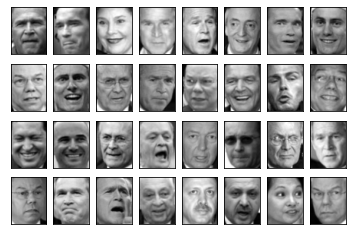

In [6]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[])) 
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

# PCA

In [ ]:
"""
We would like to plot a low-dimensional embedding of the 2,914-dimensional data to learn the fundamental 
relationships between the images. One useful way to start is to compute a PCA, and examine the explained 
variance ratio, which will give us an idea of how many LINEAR (PAY ATTENTION HERE!) features are required 
to describe the data.
"""

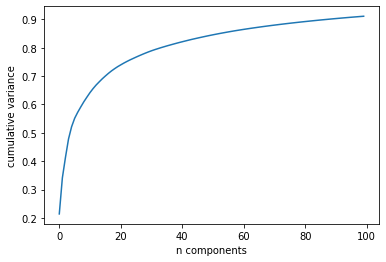

In [11]:
model = PCA(100).fit(faces.data) 
plt.plot(np.cumsum(model.explained_variance_ratio_)) 
plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [ ]:
"""
We see that for this data, nearly 100 components are required to preserve 90% of the variance. This tells us 
that the data is INTRISICALLY very high dimensional and it CAN'T be described LINEARLY with just a few components.
When this is the case, nonlinear manifold embeddings like LLE and Isomap can be helpful.
"""

# Non-linear manifold embeddings

In [13]:
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

In [ ]:
"""
The output is a two-dimensional projection of all the input images. To get a better idea of what the projection 
tells us, let’s define a function that will output image thumbnails at the locations of the projections:
"""

In [18]:
def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1) 
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(images[i], cmap=cmap),
            proj[i])
            ax.add_artist(imagebox)                

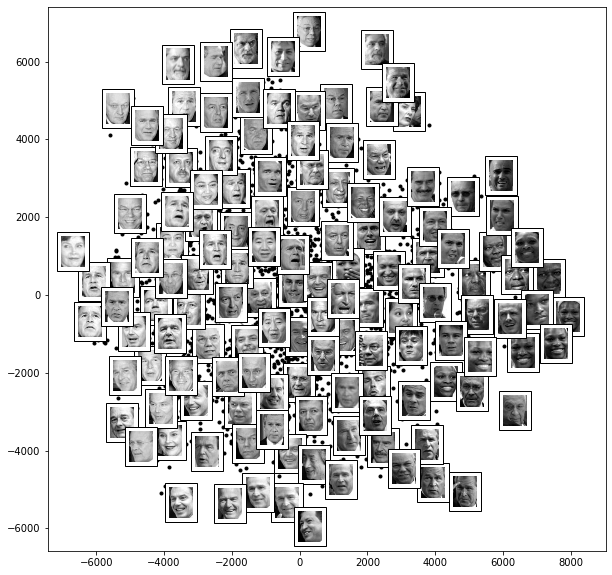

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

In [ ]:
"""
The result is interesting: the first two Isomap dimensions seem to describe global image features: the overall 
darkness or lightness of the image from left to right, and the general orientation of the face from bottom to top. 
This gives us a nice visual indication of some of the fundamental features in our data.
"""